# <center> Language Modelling Al-Quran Indonesia

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from textblob import TextBlob
import cufflinks as cf
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../dataset/data_preparation.csv', index_col=0)

In [3]:
data.head(15)

,Surah,Ayah,Text,Char_Length
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,65
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",43
2,1,3,Maha Pemurah lagi Maha Penyayang.,33
3,1,4,Yang menguasai di Hari Pembalasan.,34
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",86
5,1,6,Tunjukilah kami jalan yang lurus,32
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,147
7,2,1,Alif laam miim.,15
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,83
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...",141


In [4]:
# casefolding

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('user',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

def casefold(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    return text

data['Casefolding'] = tqdm(data['Text'].apply(casefold))

  0%|          | 0/6236 [00:00<?, ?it/s]

In [5]:
data.head(15)

,Surah,Ayah,Text,Char_Length,Casefolding
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,65,dengan menyebut nama allah yang maha pemurah l...
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",43,segala puji bagi allah tuhan semesta alam
2,1,3,Maha Pemurah lagi Maha Penyayang.,33,maha pemurah lagi maha penyayang
3,1,4,Yang menguasai di Hari Pembalasan.,34,yang menguasai di hari pembalasan
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",86,hanya engkaulah yang kami sembah dan hanya kep...
5,1,6,Tunjukilah kami jalan yang lurus,32,tunjukilah kami jalan yang lurus
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,147,yaitu jalan orang orang yang telah engkau ber...
7,2,1,Alif laam miim.,15,alif laam miim
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,83,kitab al quran ini tidak ada keraguan padanya ...
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...",141,yaitu mereka yang beriman kepada yang ghaib y...


In [6]:
# tokenizing

data["Tokenizing"] = [word_tokenize(Tweet.lower()) for Tweet in tqdm(data.Casefolding)]

  0%|          | 0/6236 [00:00<?, ?it/s]

In [7]:
data.head(15)

,Surah,Ayah,Text,Char_Length,Casefolding,Tokenizing
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,65,dengan menyebut nama allah yang maha pemurah l...,"[dengan, menyebut, nama, allah, yang, maha, pe..."
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",43,segala puji bagi allah tuhan semesta alam,"[segala, puji, bagi, allah, tuhan, semesta, alam]"
2,1,3,Maha Pemurah lagi Maha Penyayang.,33,maha pemurah lagi maha penyayang,"[maha, pemurah, lagi, maha, penyayang]"
3,1,4,Yang menguasai di Hari Pembalasan.,34,yang menguasai di hari pembalasan,"[yang, menguasai, di, hari, pembalasan]"
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",86,hanya engkaulah yang kami sembah dan hanya kep...,"[hanya, engkaulah, yang, kami, sembah, dan, ha..."
5,1,6,Tunjukilah kami jalan yang lurus,32,tunjukilah kami jalan yang lurus,"[tunjukilah, kami, jalan, yang, lurus]"
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,147,yaitu jalan orang orang yang telah engkau ber...,"[yaitu, jalan, orang, orang, yang, telah, engk..."
7,2,1,Alif laam miim.,15,alif laam miim,"[alif, laam, miim]"
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,83,kitab al quran ini tidak ada keraguan padanya ...,"[kitab, al, quran, ini, tidak, ada, keraguan, ..."
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...",141,yaitu mereka yang beriman kepada yang ghaib y...,"[yaitu, mereka, yang, beriman, kepada, yang, g..."


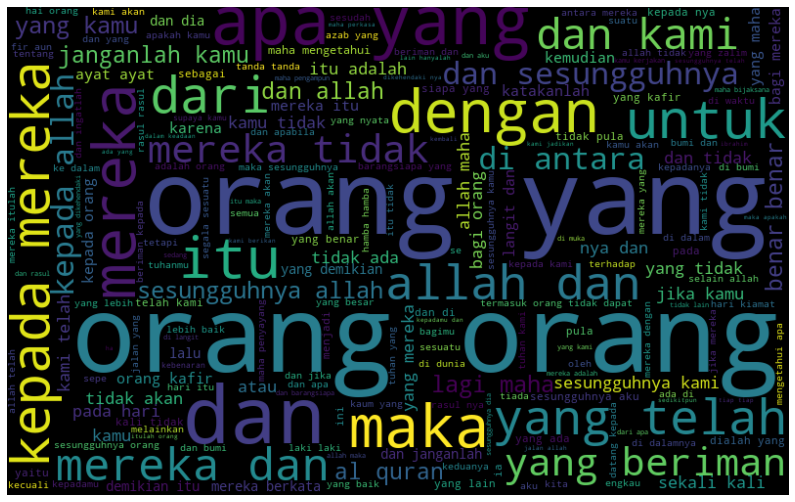

In [8]:
# wordcloud

wordcloud =' '.join([text for text in data['Casefolding']])

wordcloud = WordCloud(width=800,
                      height=500,
                      random_state=21,
                      max_font_size=110).generate(wordcloud)
plt.figure(figsize=(14, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data['Char_Length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Char_Length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [10]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_word = get_top_n_words(data['Casefolding'], 20)
common_words = get_top_n_bigram(data['Casefolding'], 20)

In [11]:
# The distribution of top unigrams before removing stop words

df1 = pd.DataFrame(common_word, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

In [12]:
# The distribution of top bigrams before removing stop words

df3 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')

In [13]:
# The distribution of top part-of-speech tags of review corpus

blob = TextBlob(str(data['Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

In [14]:
# save dataset

data.to_csv("../dataset/data_preprocessing.csv", index=False)